In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.0/755.0 kB 10.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [ ]:
from ultralytics import YOLO
import cv2
model = YOLO('yolov8n-pose.pt')

100%|██████████| 6.51M/6.51M [00:00<00:00, 106MB/s]



image 1/1 /content/Q3_pose.png: 448x640 12 persons, 17.8ms
Speed: 2.7ms preprocess, 17.8ms inference, 2.6ms postprocess per image at shape (1, 3, 448, 640)

 8 Persons detected.


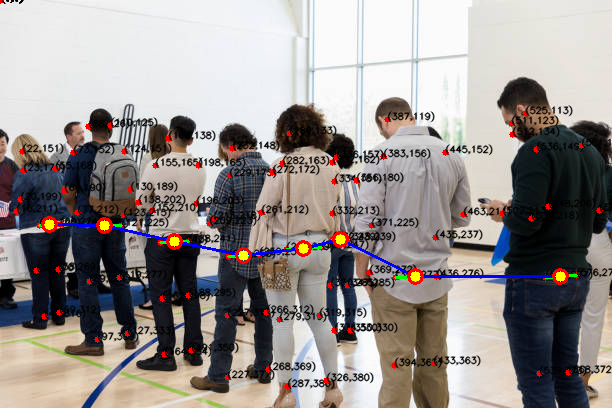

In [81]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from ultralytics import YOLO
import numpy as np
import pandas as pd

def significant_pose_detection(arr, th):
  n = len(arr)
  i=0
  for itemm in arr:
    if np.sum(itemm[0]+itemm[1])!=0:
      i = i + 1

  sig_det = (i/n)
  if sig_det>=th:
    return 1

  return 0


# Load a model
model = YOLO('yolov8n-pose.pt')

image_file_name = "Q3_pose.png"
img = cv2.imread(image_file_name)
results = model.predict(image_file_name)[0]
th = 0.3

Q = []
det = 0
concat_df = pd.DataFrame()

for result in results:
  landmarks = []
  kpts = result.keypoints
  nk = kpts.shape[1]

  for i in range(nk):
    keypoint = kpts.xy[0, i]
    x, y = int(keypoint[0].item()), int(keypoint[1].item())
    landmarks.append([x,y])

  # Create a NumPy Array from list
  detections = significant_pose_detection(landmarks, th)
  if detections==1:
    det = det + 1
    for j in range(len(landmarks)):
      x = landmarks[j][0]
      y = landmarks[j][1]
      cv2.circle(img, (x, y), 3, (0, 0, 255), -1)
      ttext = "("+str(x)+","+str(y)+")"
      cv2.putText(img, ttext, (x, y), cv2.FONT_HERSHEY_SIMPLEX,
                    0.3, (0,0,0), 1, cv2.LINE_AA)

    # Calling DataFrame constructor on list
    df = pd.DataFrame(landmarks, columns =['x'+str(det), 'y'+str(det)], dtype = float)
    concat_df = pd.concat([concat_df, df], axis=1)

    cv2.line(img, landmarks[11], landmarks[12], (0,255,0), 2)
    a = (landmarks[11][0] + landmarks[12][0])//2
    b = (landmarks[11][1] + landmarks[12][1])//2
    #print(a," ",b)
    #cv2.circle(img, (a, b), 5, (0, 255, 255), -1)
    #cv2.circle(img, (a, b), 7, (0, 0, 255), 2)
    Q.append([a,b])

m = list(map(lambda l: [v for v in l if v != 0], sorted(Q)))
# Remove empty List from List
# using list comprehension
nQ = [ele for ele in m if ele != []]


dict={}
sorted_Q=sorted(Q)
for i,point in enumerate(Q):
  j=sorted_Q.index(point)
  dict[j]=i

# print(concat_df)

#k, _, _ = results.keypoints.xy.cpu().numpy().shape
k = len(nQ)  # actual detected person after discarding zeros

# draw lines between persons
i=0
while i<(k-1):
  cv2.line(img, nQ[i], nQ[i+1], (255, 0,0), 2)
  i = i + 1

# draw centroids for each person
i = 0
while i<k:
  cv2.circle(img, nQ[i], 5, (0, 255, 255), -1)
  cv2.circle(img, nQ[i], 7, (0, 0, 255), 2)
  i = i + 1

# dataframe to csv
concat_df.to_csv('detected_pose.csv')
df_nQ = pd.DataFrame(nQ, columns =['x', 'y'], dtype = int)
df_nQ.to_csv('nQ_centroids.csv')


print("\n", k, "Persons detected.")
cv2.imwrite("output.jpg", img)
cv2_imshow(img)

408 612
[[49, 224], [104, 225], [174, 241], [243, 255], [303, 248], [340, 239], [415, 276], [560, 276]]


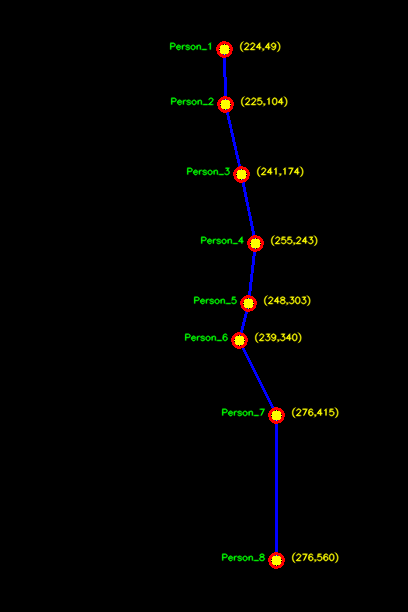

In [82]:
image_file_name = "output.jpg"
src = cv2.imread(image_file_name)
h,w,c = src.shape
print(h,w)
canva = np.zeros([h,w,3],dtype=np.uint8)  # change the h, w
print(nQ)

nQT = [[itemm[1],itemm[0]] for itemm in nQ]

# draw lines between persons
i=0
while i<(k-1):
  cv2.line(canva, nQ[i], nQ[i+1], (255, 0,0), 2)
  i = i + 1

# draw centroids for each person
i = 0
while i<k:
  cv2.circle(canva, nQ[i], 5, (0, 255, 255), -1)
  cv2.circle(canva, nQ[i], 7, (0, 0, 255), 2)
  ttext = "("+str(nQ[i][0])+","+str(nQ[i][1])+")"

  i = i + 1

canva = cv2.rotate(canva, cv2.ROTATE_90_CLOCKWISE)
## ---------------------------------------------------------------------
# Use Flip code 0 to flip vertically
image = cv2.flip(canva, 1)
i = 0
while i<k:
  ttext = "("+str(nQT[i][0])+","+str(nQT[i][1])+")"
  cv2.putText(image, ttext, (nQ[i][1]+15, nQ[i][0]), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0,255,255), 1, cv2.LINE_AA)
  cv2.putText(image, "Person_"+str(i+1), (nQT[i][0]-55, nQT[i][1]), cv2.FONT_HERSHEY_SIMPLEX,
                    0.3, (0,255,0), 1, cv2.LINE_AA)
  i = i + 1

cv2.imwrite("canvas.jpg", image)
cv2_imshow(image)

In [ ]:
# import math

# def calculate_slope(p1, p2):
#     return (p2[1] - p1[1]) / (p2[0] - p1[0])

# def calculate_tension(nQ):
#     G = 6.67430e-11

#     tnet = [0]*len(nQ)

#     def distance(p1, p2):
#         return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

#     for i in range(len(nQ)):
#         if i == 0:
#             r = distance(nQ[i], nQ[i+1])
#             tnet[i] = G / r**2
#         elif i == len(nQ) - 1:
#             r = distance(nQ[i], nQ[i-1])
#             tnet[i] = G / r**2
#         else:
#             r1 = distance(nQ[i], nQ[i-1])
#             r2 = distance(nQ[i], nQ[i+1])
#             t1 = G / r1**2
#             t2 = G / r2**2
#             m1 = calculate_slope(nQ[i-1], nQ[i])
#             m2 = calculate_slope(nQ[i], nQ[i+1])
#             theta = math.atan((m2-m1)/(1+m1*m2))
#             if theta<0:
#               theta+=math.pi
#             tnet[i] = math.sqrt(t1**2 + t2**2 + 2*t1*t2*math.cos(theta))

#     return tnet

# tnet=calculate_tension(nQ)
# print(tnet)

[7.28874085399148e-15, 6.088322068671194e-15, 3.8424163304649834e-16, 1.4856412586773556e-15, 6.422903574981252e-15, 8.362381150906474e-15, 1.2203229889775391e-14, 3.855222077424644e-14, 2.4927976211801715e-14, 2.8131928345626975e-15]


In [83]:
import math

def calculate_slope(p1, p2):
    return (p2[1] - p1[1]) / (p2[0] - p1[0])

def calculate_tension(nQ):
    G = 6.67430e-11

    tnet = [0]*len(nQ)

    def distance(p1, p2):
        return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

    for i in range(len(nQ)):
        if i == 0:
            r = distance(nQ[i], nQ[i+1])
            tnet[i] = G / r**2
        elif i == len(nQ) - 1:
            r = distance(nQ[i], nQ[i-1])
            tnet[i] = G / r**2
        else:
            r1 = distance(nQ[i], nQ[i-1])
            r2 = distance(nQ[i], nQ[i+1])
            t1 = G / r1**2
            t2 = G / r2**2
            m1 = calculate_slope(nQ[i-1], nQ[i])
            m2 = calculate_slope(nQ[i], nQ[i+1])
            if m1==0:
              m1,m2=m2,m1
            elif m1!=0 and m2!=0:
              intercept1=nQ[i-1][0]-nQ[i-1][1]/m1
              intercept2=nQ[i+1][0]-nQ[i+1][1]/m2
              if(intercept1<intercept2):
                m1,m2=m2,m1
            tanVal=(m1-m2)/(1+m1*m2)
            if(tanVal>0):
              phy=math.pi-math.atan(abs(tanVal))
            else:
              phy=math.atan(abs(tanVal))
            tnet[i] = math.sqrt(t1**2 + t2**2 + 2*t1*t2*math.cos(phy))

    return tnet

tnet=calculate_tension(nQ)
print(tnet)

[2.2056510244547256e-14, 9.755005249639476e-15, 6.123131007774741e-16, 3.136802003207277e-14, 2.796529347712939e-14, 5.369790615698906e-14, 6.841724237876101e-15, 3.1744589774078473e-15]


In [84]:
tnet

[2.2056510244547256e-14,
 9.755005249639476e-15,
 6.123131007774741e-16,
 3.136802003207277e-14,
 2.796529347712939e-14,
 5.369790615698906e-14,
 6.841724237876101e-15,
 3.1744589774078473e-15]

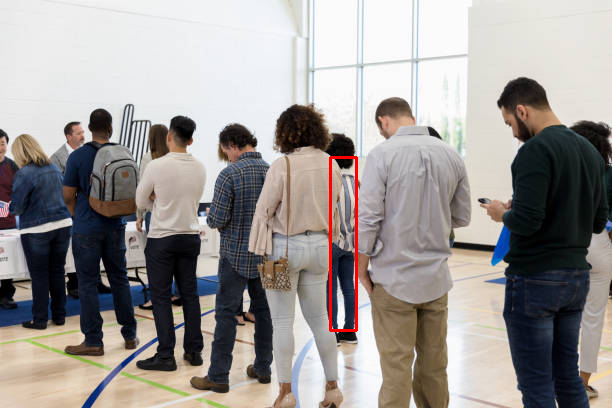

In [87]:
import cv2
import numpy as np

def mark_outliers(nQ, tnet, threshold):
    img = cv2.imread('Q3_pose.png')

    nQ = np.array(nQ, dtype=int)

    for i in range(len(nQ)):
        if tnet[i] > threshold:
            person_no = dict[i] + 1

            x = concat_df['x' + str(person_no)]
            y = concat_df['y' + str(person_no)]

            x_non_zero = [value for value in x if value != 0]
            y_non_zero = [value for value in y if value != 0]

            min_x = int(min(x_non_zero)) if x_non_zero else 0
            min_y = int(min(y_non_zero)) if y_non_zero else 0
            max_x = int(max(x_non_zero)) if x_non_zero else 0
            max_y = int(max(y_non_zero)) if y_non_zero else 0

            start_point = (min_x, min_y)
            end_point = (max_x, max_y)
            color = (0, 0, 255)
            thickness = 2
            img = cv2.rectangle(img, start_point, end_point, color, thickness)

    cv2.imwrite('output_outlier.png', img)
    cv2_imshow(img)

tnet = calculate_tension(nQ)
# threshold = 5.369790615698905e-14
threshold=3.136802003207277e-14
mark_outliers(nQ, tnet, threshold)